# Technology focus: CosMx
This notebook will present a rough overview of the plotting functionalities that `spatialdata` implements for COSMX data.

## Loading the data
Please download the data from here: [CosMx dataset](https://s3.embl.de/spatialdata/spatialdata-sandbox/cosmx_io.zip) and adjust the variable containing the location of the `.zarr` file.


In [1]:
cosmx_zarr_path = "./cosmx.zarr"

In [2]:
import warnings

import spatialdata as sd

warnings.filterwarnings("ignore")

cosmx_sdata = sd.read_zarr(cosmx_zarr_path)
cosmx_sdata

/opt/miniconda3/envs/ome/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


SpatialData object, with associated Zarr store: /Users/macbook/embl/projects/basel/spatialdata-sandbox/cosmx_io/data.zarr
├── Images
│     ├── '1_image': DataArray[cyx] (3, 3648, 5472)
│     ├── '2_image': DataArray[cyx] (3, 3648, 5472)
│     ├── '3_image': DataArray[cyx] (3, 3648, 5472)
│     ├── '4_image': DataArray[cyx] (3, 3648, 5472)
│     ├── '5_image': DataArray[cyx] (3, 3648, 5472)
│     ├── '6_image': DataArray[cyx] (3, 3648, 5472)
│     ├── '7_image': DataArray[cyx] (3, 3648, 5472)
│     ├── '8_image': DataArray[cyx] (3, 3648, 5472)
│     ├── '9_image': DataArray[cyx] (3, 3648, 5472)
│     ├── '10_image': DataArray[cyx] (3, 3648, 5472)
│     ├── '11_image': DataArray[cyx] (3, 3648, 5472)
│     ├── '12_image': DataArray[cyx] (3, 3648, 5472)
│     ├── '13_image': DataArray[cyx] (3, 3648, 5472)
│     ├── '14_image': DataArray[cyx] (3, 3648, 5472)
│     ├── '15_image': DataArray[cyx] (3, 3648, 5472)
│     ├── '16_image': DataArray[cyx] (3, 3648, 5472)
│     ├── '17_image': DataAr

## Visualise the data
As we can see, the data contains 30 slides which would make plotting very cumbersome. Thereofore, we will only focus on one coordinate systems for now (`2`) but then also later provide a plot of all coordinate systems. Let's visualise some of the data contained in the `spatialdata` object. For this, we will need to load the `spatialdata-plot` library.

INFO     Rasterizing image for faster rendering.                                                                   


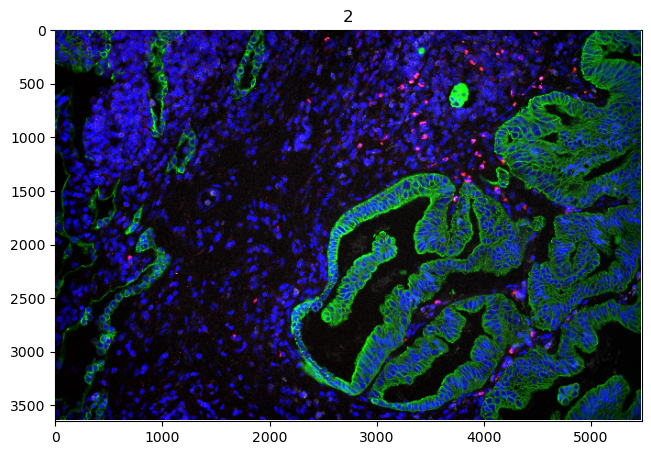

In [3]:
cosmx_sdata.pl.render_images().pl.show(coordinate_systems=["2"])

INFO     Rasterizing image for faster rendering.                                                                   


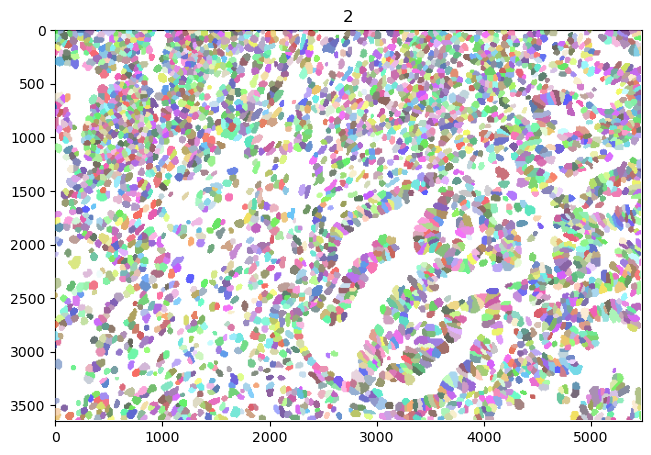

In [4]:
cosmx_sdata.pl.render_labels().pl.show(coordinate_systems=["2"])

INFO     Using 'datashader' backend with 'None' as reduction method to speed up plotting. Depending on the         
         reduction method, the value range of the plot might change. Set method to 'matplotlib' do disable this    
         behaviour.                                                                                                


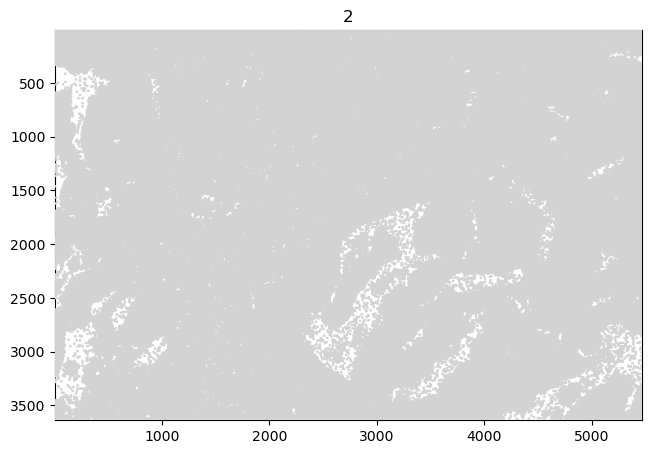

In [5]:
cosmx_sdata.pl.render_points().pl.show(coordinate_systems=["2"])

We can see that the points layer features too many points to properly visualise in a small'ish plot. Therefore, we reduce their number to only 1 % of the total.

INFO     Using 'datashader' backend with 'None' as reduction method to speed up plotting. Depending on the         
         reduction method, the value range of the plot might change. Set method to 'matplotlib' do disable this    
         behaviour.                                                                                                


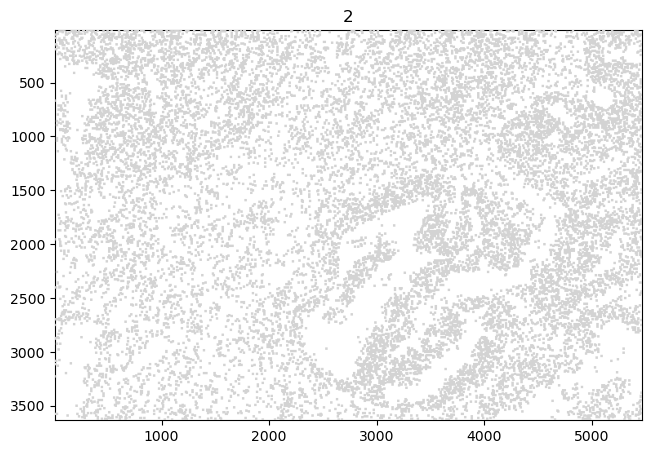

In [6]:
cosmx_sdata.points["2_points"] = cosmx_sdata.points["2_points"].sample(frac=0.01)
cosmx_sdata.pl.render_points().pl.show(coordinate_systems=["2"])

 Furthermore, we are going to convert the `CellComp` column of the points layer to a categorical column. This will allow us to colour the points by their cell type.

INFO     Using 'datashader' backend with 'None' as reduction method to speed up plotting. Depending on the         
         reduction method, the value range of the plot might change. Set method to 'matplotlib' do disable this    
         behaviour.                                                                                                


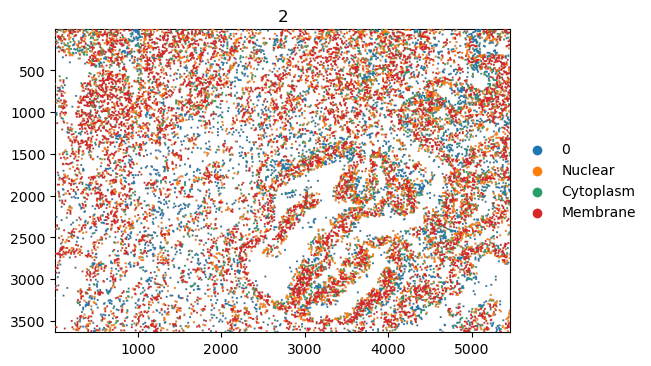

In [7]:
import pandas as pd

cat_type = pd.CategoricalDtype(cosmx_sdata.points["2_points"]["CellComp"].unique())
cosmx_sdata.points["2_points"]["CellComp"] = cosmx_sdata.points["2_points"]["CellComp"].astype(cat_type)

cosmx_sdata.pl.render_points(color="CellComp").pl.show(coordinate_systems=["2"])

We can further overlay that information with the cell_labels. This will allow us to see which points actually lay inside the borders of an annotated cell.

INFO     Using 'datashader' backend with 'None' as reduction method to speed up plotting. Depending on the         
         reduction method, the value range of the plot might change. Set method to 'matplotlib' do disable this    
         behaviour.                                                                                                
INFO     Rasterizing image for faster rendering.                                                                   


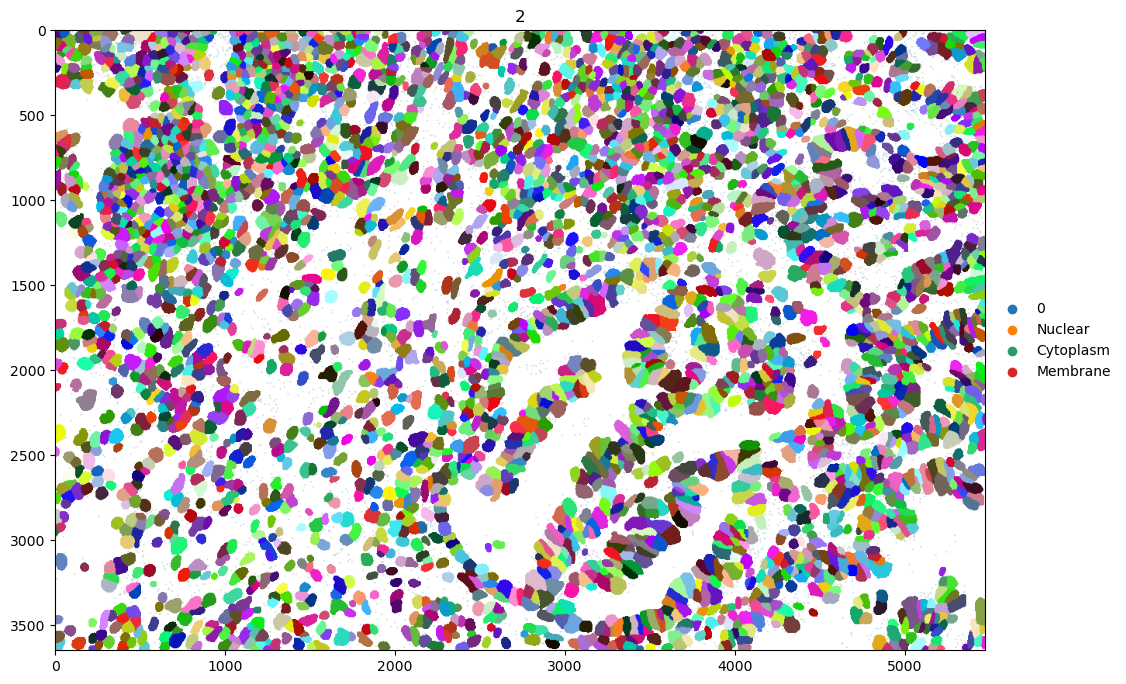

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 12))

# As you can see here we use a fill_alpha of 1. This is because of a bug when trying to plot purely the
# outline. This issue is described here: https://github.com/scverse/spatialdata-plot/issues/240
(
    cosmx_sdata.pl.render_points(elements="2_points", color="CellComp", alpha=0.5)  #
    .pl.render_labels(elements="2_labels", fill_alpha=1, outline=True, contour_px=3)
    .pl.show(coordinate_systems=["2"], ax=ax)
)

We can see, that the `0` label locates outside of the annotated cells. Finally, let's visualise all images contained in the data.

INFO     Rasterizing image for faster rendering.                                                                   
INFO     Rasterizing image for faster rendering.                                                                   
INFO     Rasterizing image for faster rendering.                                                                   
INFO     Rasterizing image for faster rendering.                                                                   
INFO     Rasterizing image for faster rendering.                                                                   
INFO     Rasterizing image for faster rendering.                                                                   
INFO     Rasterizing image for faster rendering.                                                                   
INFO     Rasterizing image for faster rendering.                                                                   


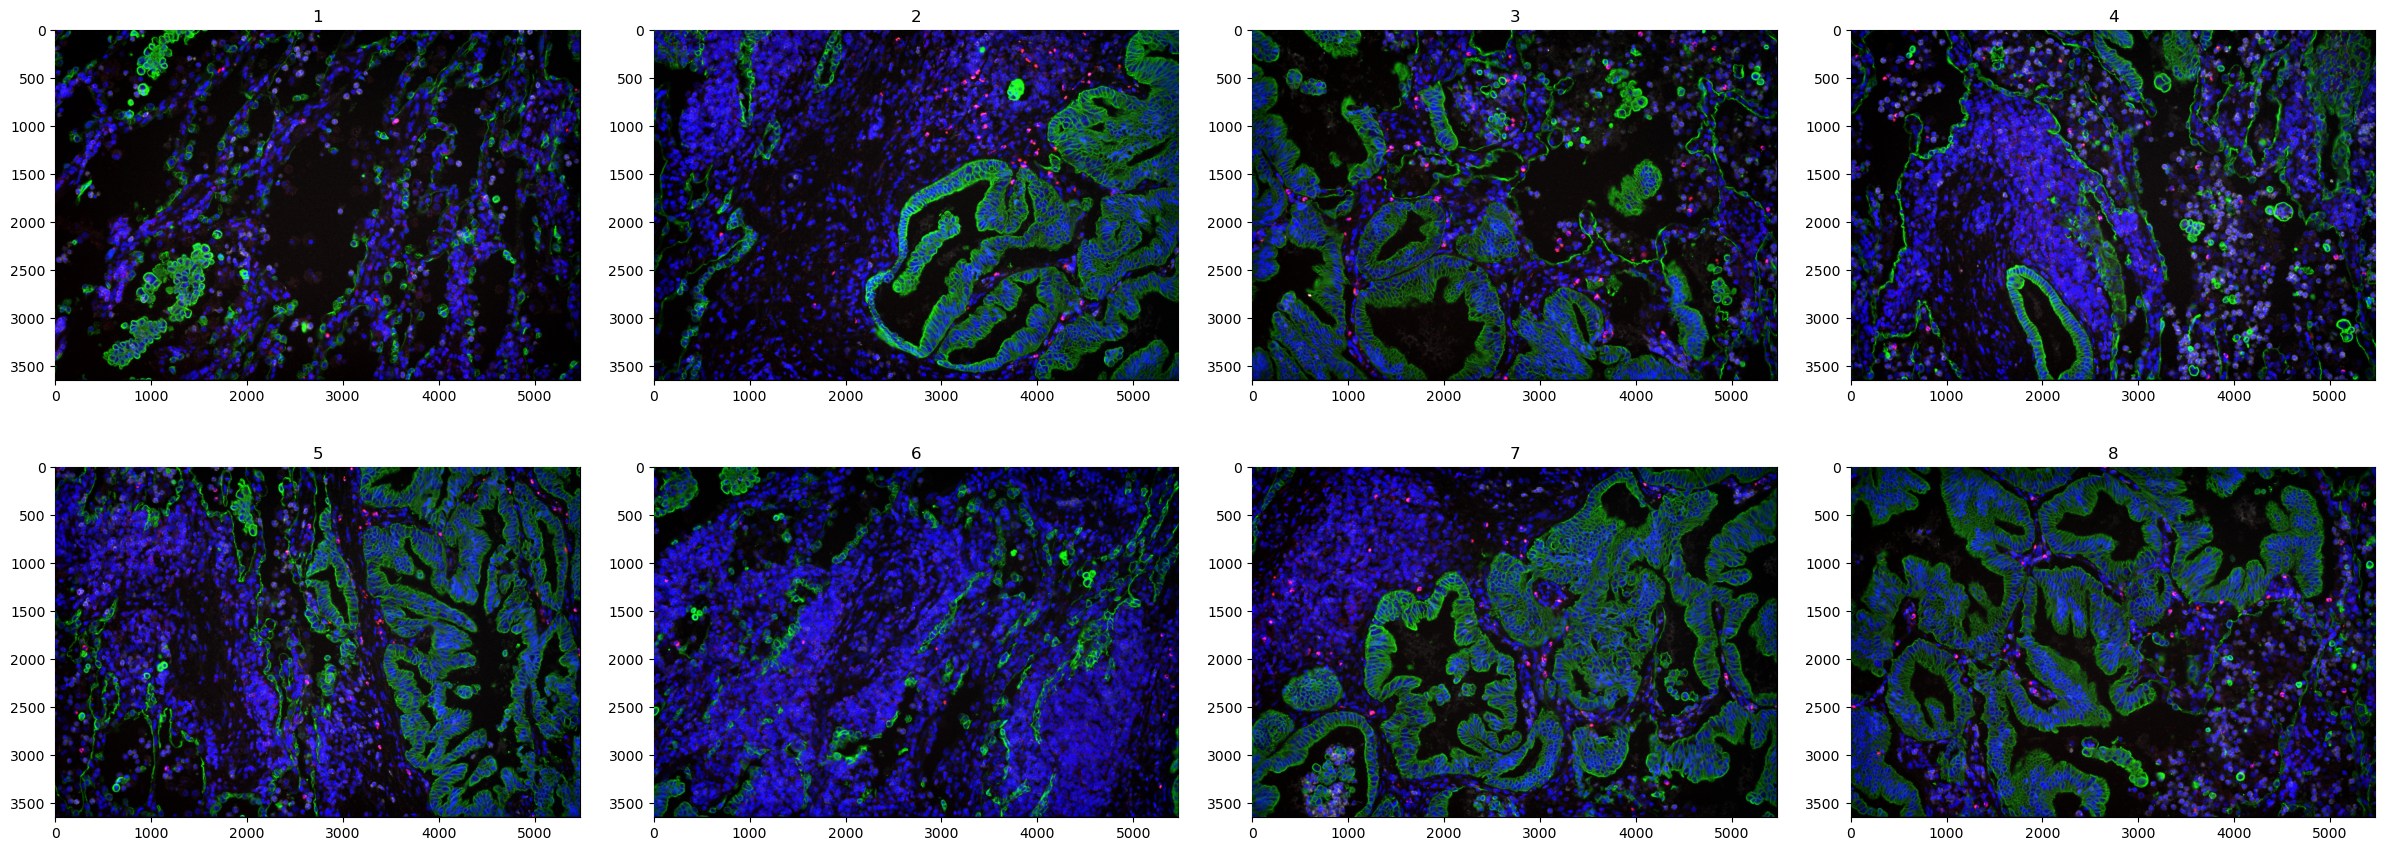

In [9]:
cosmx_sdata.pl.render_images().pl.show(coordinate_systems=[str(i + 1) for i in range(8)])